# Linear regression using Least Squares

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


## Load data

In [3]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Transform smoker and sex columns into numeric values
data["smoker"] = data["smoker"].apply(lambda x: 1 if x == "yes" else 0)
data["sex"] = data["sex"].apply(lambda x: 1 if x == "female" else 0)

# Remove region column
data.drop(
    columns=["region"],
    inplace=True,
)

# Add constant for bias estimation
data.insert(0, "constant", 1)
data


,constant,age,sex,bmi,children,smoker,charges
0,1,19,1,27.900,0,1,16884.92400
1,1,18,0,33.770,1,0,1725.55230
2,1,28,0,33.000,3,0,4449.46200
3,1,33,0,22.705,0,0,21984.47061
4,1,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,1,50,0,30.970,3,0,10600.54830
1334,1,18,1,31.920,0,0,2205.98080
1335,1,18,1,36.850,0,0,1629.83350
1336,1,21,1,25.800,0,0,2007.94500


In [5]:
# Show data correlation according to pearson's correlation coeficient
data.corr()


,constant,age,sex,bmi,children,smoker,charges
constant,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
sex,NaN,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
bmi,NaN,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
children,NaN,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
smoker,NaN,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
charges,NaN,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


## Split into train and test

In [6]:
data = data.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(
    data[:, :-1], data[:, -1], test_size=0.33, random_state=42
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((896, 6), (442, 6), (896,), (442,))

## Calculate weights

![alt text](leastsquares.png "Least Squares equation")

In [7]:
# Calculate weights according to the matrix notation of the derivatives
w = np.matmul(
    np.matmul(np.linalg.inv(np.matmul(x_train.T, x_train)), x_train.T), y_train
)
w


array([-12357.72588349,    262.35104943,   -146.5321422 ,    331.64087047,
          377.66377381,  23693.21588352])

## Predict over test set

In [8]:
def predict(x):
    return np.dot(x, w)


y_pred = predict(x_test)

r2_score(y_true=y_test, y_pred=y_pred)


0.7587422388407032

## Plot results

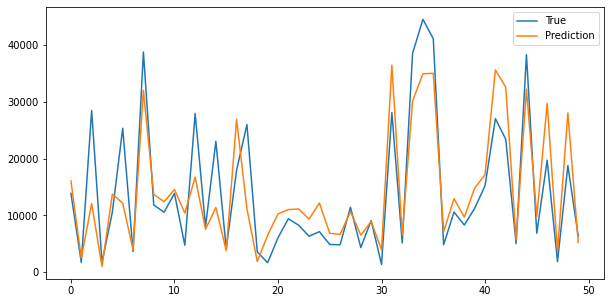

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(y_test[50:100], label="True")
plt.plot(y_pred[50:100], label="Prediction")
plt.legend()
plt.show()
